<a href="https://colab.research.google.com/github/cserik/DeepLearningNHF/blob/main/DataPreprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image
from tempfile import TemporaryFile
from numpy import savez_compressed

**<--------Copy kaggle.json file from github to files tab(content directory)**

In [2]:
#our dataset is from kaggle
!pip install kaggle

In [3]:
#we created an API token for kaggle (kaggle.json file)
#make a directory with a name : kaggle
!mkdir ~/.kaggle

In [4]:
#copy kaggle.json file to kaggle 
!cp kaggle.json ~/.kaggle/

In [5]:
#change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#download the dataset from kaggle
!kaggle datasets download -d badasstechie/celebahq-resized-256x256

 99% 281M/283M [00:02<00:00, 146MB/s]
100% 283M/283M [00:02<00:00, 112MB/s]


In [ ]:
!unzip celebahq-resized-256x256.zip

In [8]:
base_dir = 'celeba_hq_256' 

#get the name of the images
train_fnames = os.listdir(base_dir)
print(train_fnames[:10])

['25478.jpg', '26099.jpg', '09994.jpg', '01270.jpg', '28884.jpg', '00778.jpg', '04917.jpg', '02658.jpg', '08965.jpg', '21257.jpg']


In [9]:
image_count = len(train_fnames)
print("Number of images:" ,image_count)

Number of images: 30000


In [15]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 29.4 MB/s 


In [20]:
from mtcnn.mtcnn import MTCNN

# load an image as an rgb numpy array
def load_image(filename):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = np.asarray(image)
	return pixels
 
# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(256, 256)):
	# detect face in the image
	faces = model.detect_faces(pixels)
	# skip cases where we could not detect a face
	if len(faces) == 0:
		return None
	# extract details of the face
	x1, y1, width, height = faces[0]['box']
	# force detected pixel values to be positive (bug fix)
	x1, y1 = abs(x1), abs(y1)
	# convert into coordinates
	x2, y2 = x1 + width, y1 + height
	# retrieve face pixels
	face_pixels = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face_pixels)
	image = image.resize(required_size)
	face_array = np.asarray(image)
	return face_array
 
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
  #MTCNN or Multi-Task Cascaded Convolutional Neural Networks is a neural network which detects faces and facial landmarks on images
  #We used this pretrained model to extract faces from the images
  #we hope that it will improve the training process
	# prepare MTCNN model
	model = MTCNN()
	faces = list()
	# enumerate files
	for filename in os.listdir(directory):
		# load the image
		pixels = load_image(directory + filename)
		# get face
		face = extract_face(model, pixels)
		if face is None:
			continue
		# store
		faces.append(face)
		print(len(faces), face.shape)
		# stop once we have enough
		if len(faces) >= n_faces:
			break
	return np.asarray(faces)

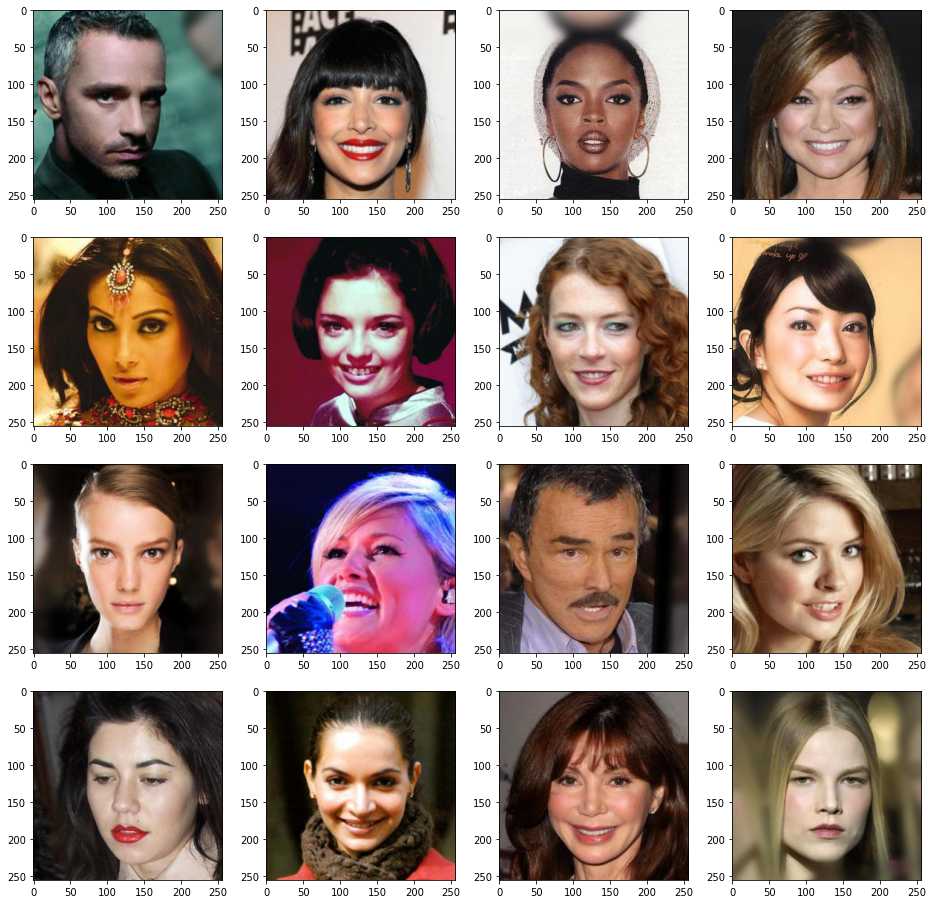

In [10]:
#plot some images from the dataset
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_images = [os.path.join(base_dir, fname) for fname in train_fnames[:int(ncols*nrows)]]

for i, img_path in enumerate(next_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [22]:
 # directory that contains all images
directory = 'celeba_hq_256/'
# load and extract all faces
cropped_faces = load_faces(directory, 16)

1 (256, 256, 3)
2 (256, 256, 3)
3 (256, 256, 3)
4 (256, 256, 3)
5 (256, 256, 3)
6 (256, 256, 3)
7 (256, 256, 3)
8 (256, 256, 3)
9 (256, 256, 3)
10 (256, 256, 3)
11 (256, 256, 3)
12 (256, 256, 3)
13 (256, 256, 3)
14 (256, 256, 3)
15 (256, 256, 3)
16 (256, 256, 3)


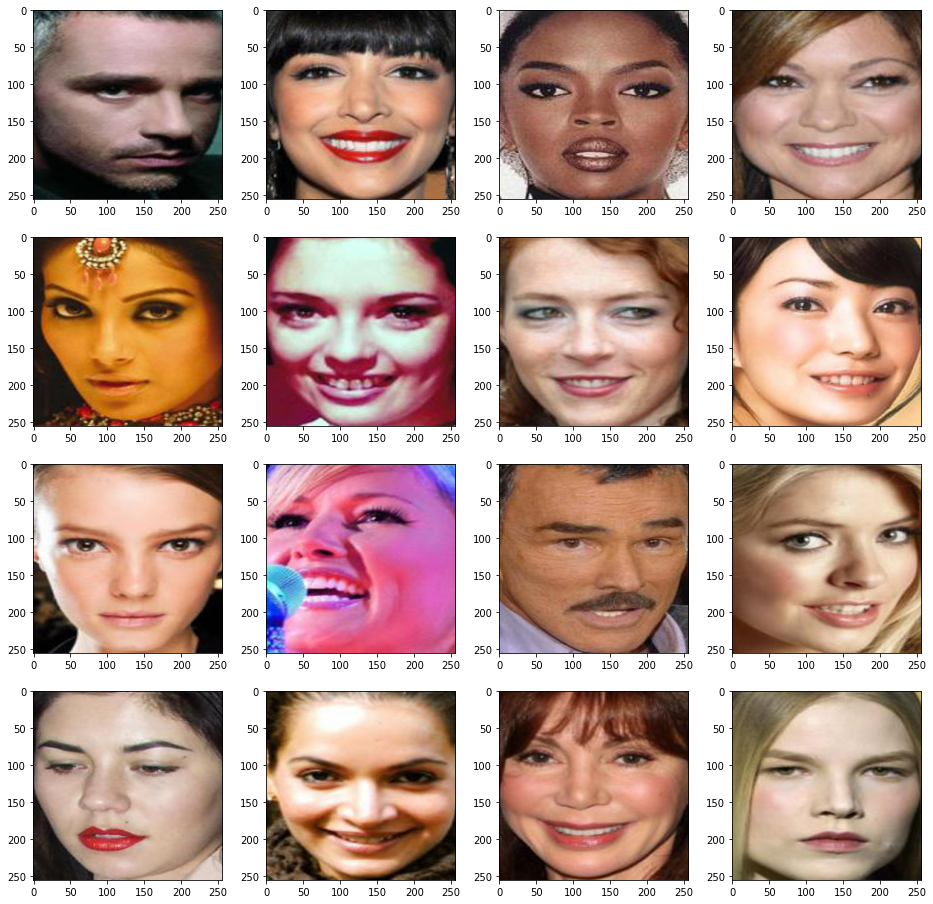

In [32]:
#plot some cropped images from the dataset
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows,ncols, figsize=(16,16))
for i,ax in enumerate(axes.flat):
    ax.imshow(cropped_faces[i])
